##1.패키지 불러옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,238 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121926 files and dire

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

##2.데이터 불러옴

In [ ]:
# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/분석할구별데이터.csv')

In [ ]:
# 데이터 로드
df0 = pd.read_csv('/content/학습데이터준비.csv',encoding='euc-kr')

In [ ]:
df0

In [ ]:
df0 = df0.rename(columns={'Unnamed: 0': '자치구'})

In [ ]:
df0.set_index('자치구')

In [ ]:
df0.columns

Index(['자치구', '음식점개수', '주점개수', '지하철역개수', '자동차소유대수', '총승객수', '종사자수', '음주사고위험율'], dtype='object')

In [ ]:
# 스케일링할 컬럼들
cols_to_scale = ['음식점개수', '주점개수', '지하철역개수', '자동차소유대수']

# MinMaxScaler를 사용하여 0.01에서 1 사이로 스케일링
scaler = MinMaxScaler(feature_range=(0.01, 1))
df0[cols_to_scale] = scaler.fit_transform(df0[cols_to_scale])

print(df0)

In [ ]:
data.head()

,Unnamed: 0,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,사고건수,자동차소유대수,...,80대 이상,Afternoon,Early Morning,Evening,Late Night,Morning,Night,평균알콜농도,총적발횟수,음주사고위험율
0,강남구,6749,1804,559,7707,1230,19401,25,163,10782,...,0.000000,0.033033,0.146146,0.043544,0.384885,0.060561,0.331832,0.126381,1,100.000000
1,강동구,1448,947,441,3134,654,16121,12,20,7594,...,0.000000,0.041985,0.120229,0.076336,0.341603,0.040076,0.379771,0.128860,1,46.656049
2,강북구,1382,0,417,2303,609,11650,11,6,5778,...,0.001835,0.033028,0.097248,0.031193,0.346789,0.067890,0.423853,0.111877,1,44.203137
3,강서구,2276,1350,624,4148,912,19387,16,28,10313,...,0.001120,0.030235,0.148936,0.063830,0.301232,0.057111,0.398656,0.122815,1,54.441004
4,관악구,4848,66,504,3532,952,23165,5,17,5722,...,0.000000,0.034139,0.133713,0.061166,0.388336,0.076814,0.305832,0.125279,1,49.054006


In [ ]:
data.set_index('Unnamed: 0')

,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,사고건수,자동차소유대수,22년 음주단속수,...,80대 이상,Afternoon,Early Morning,Evening,Late Night,Morning,Night,평균알콜농도,총적발횟수,음주사고위험율
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
강남구,6749,1804,559,7707,1230,19401,25,163,10782,1998,...,0.000000,0.033033,0.146146,0.043544,0.384885,0.060561,0.331832,0.126381,1,100.000000
강동구,1448,947,441,3134,654,16121,12,20,7594,524,...,0.000000,0.041985,0.120229,0.076336,0.341603,0.040076,0.379771,0.128860,1,46.656049
강북구,1382,0,417,2303,609,11650,11,6,5778,545,...,0.001835,0.033028,0.097248,0.031193,0.346789,0.067890,0.423853,0.111877,1,44.203137
강서구,2276,1350,624,4148,912,19387,16,28,10313,893,...,0.001120,0.030235,0.148936,0.063830,0.301232,0.057111,0.398656,0.122815,1,54.441004
관악구,4848,66,504,3532,952,23165,5,17,5722,703,...,0.000000,0.034139,0.133713,0.061166,0.388336,0.076814,0.305832,0.125279,1,49.054006
광진구,702,1462,293,3004,638,16411,8,12,6603,568,...,0.001761,0.017606,0.110915,0.045775,0.443662,0.051056,0.330986,0.121810,1,45.790514
구로구,3723,356,510,3014,657,9704,8,54,9113,445,...,0.000000,0.035955,0.139326,0.096629,0.332584,0.047191,0.348315,0.124835,1,52.144008
금천구,2149,31,350,2253,475,8733,2,17,9042,341,...,0.000000,0.043988,0.146628,0.079179,0.316716,0.043988,0.369501,0.137443,1,42.989042
노원구,1872,664,523,2701,468,6101,11,0,8008,521,...,0.000000,0.024952,0.138196,0.061420,0.376200,0.065259,0.333973,0.122640,1,42.599005


In [ ]:
data.columns

Index(['Unnamed: 0', 'CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '주차장개수',
       '지하철역개수', '사고건수', '자동차소유대수', '22년 음주단속수', '버스_승객_수', '지하철_승객_수',
       '버스승객수_scaled', '지하철승객수_scaled', '총승객수', '소음', '종사자수', '폐기물량', '남자',
       '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월',
       '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대', '70대',
       '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수', '음주사고위험율'],
      dtype='object')

In [ ]:
X = data[['음식점개수', '주점개수', '지하철역개수', '자동차소유대수', '총승객수', '종사자수']]

In [ ]:
X

,음식점개수,주점개수,지하철역개수,자동차소유대수,총승객수,종사자수
0,7707,1230,25,10782,1.000000,1.000000
1,3134,654,12,7594,0.089005,0.120248
2,2303,609,11,5778,0.235277,0.003090
3,4148,912,16,10313,0.363804,0.305679
4,3532,952,5,5722,0.654104,0.067252
5,3004,638,8,6603,0.192824,0.072108
6,3014,657,8,9113,0.321530,0.227526
7,2253,475,2,9042,0.110195,0.246381
8,2701,468,11,8008,0.282750,0.071116
9,1781,366,6,6823,0.092295,0.000000


In [ ]:
y=data['음주사고위험율']

In [ ]:
y

0     100.000000
1      46.656049
2      44.203137
3      54.441004
4      49.054006
5      45.790514
6      52.144008
7      42.989042
8      42.599005
9      41.147516
10     40.906847
11     43.813537
12     55.046278
13     40.000000
14     54.776085
15     45.949541
16     45.354909
17     59.717819
18     42.025111
19     53.761183
20     45.322820
21     45.082588
22     42.621162
23     41.283676
24     42.927701
Name: 음주사고위험율, dtype: float64

In [ ]:
data.index

RangeIndex(start=0, stop=25, step=1)

In [ ]:
xcol=[ 'CCTV개수', '지하철_승객_수','자동차소유대수','음식점개수', '주점개수', '종사자수']
# 버리는 독립변수: 'CCTV개수', '가로등개수', '버스정류소개수', '주차장개수', '지하철역개수', '버스_승객_수', , '총승객수', '소음', '폐기물량'
ycol=['음주사고위험율']

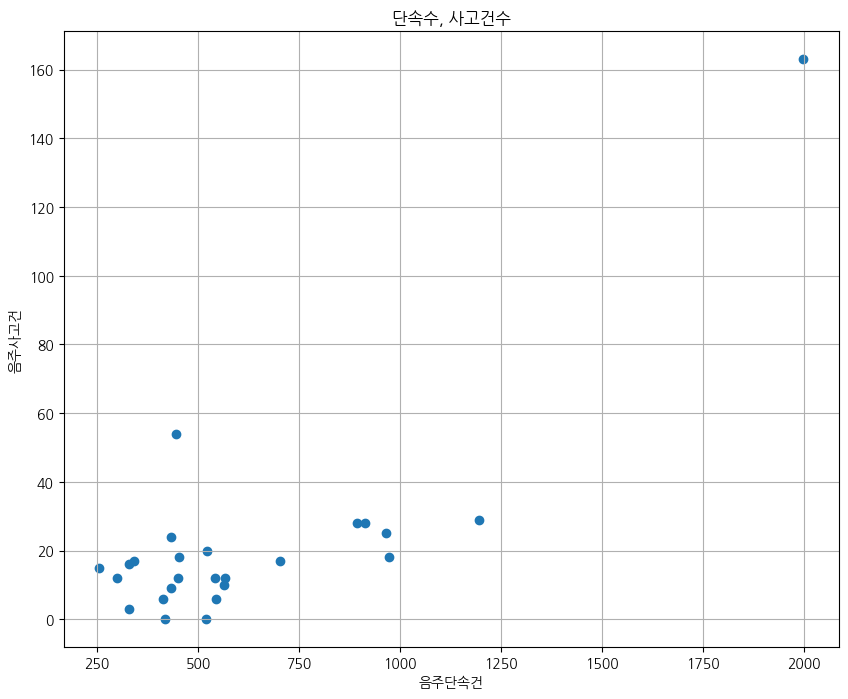

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data['22년 음주단속수'],data['사고건수'],marker='o')
plt.title('단속수, 사고건수')
plt.xlabel('음주단속건')
plt.ylabel('음주사고건')
plt.grid(True)
plt.show()

In [ ]:
data.index

RangeIndex(start=0, stop=25, step=1)

주성분으로 변환된 데이터:
        주성분1
0   5.872382
1  -0.234515
2  -0.515328
3   0.656719
4   0.040007
5  -0.333602
6   0.393755
7  -0.654319
8  -0.698971
9  -0.865140
10 -0.892692
11 -0.559930
12  0.726012
13 -0.996509
14  0.695080
15 -0.315397
16 -0.383471
17  1.260817
18 -0.764671
19  0.578892
20 -0.387145
21 -0.414647
22 -0.696435
23 -0.849552
24 -0.661341


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


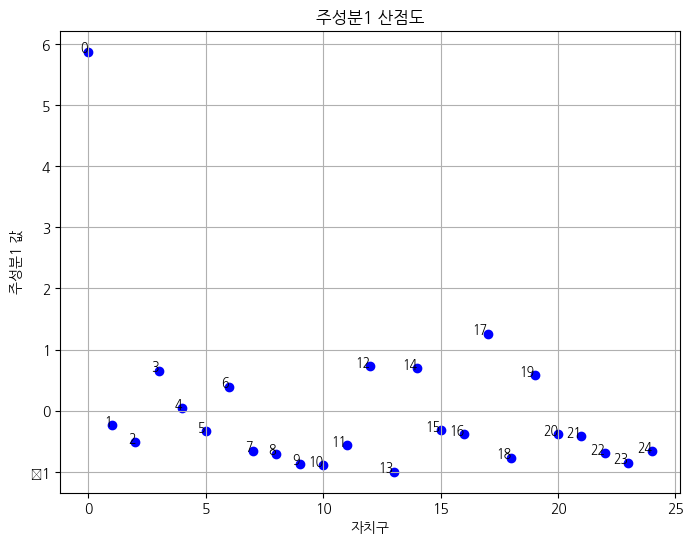

In [ ]:
# 데이터 스케일링
col=['22년 음주단속수','사고건수']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[col])

# PCA 수행
pca = PCA(n_components=1)
principal_components = pca.fit_transform(data_scaled)

# 주성분을 DataFrame으로 변환
principal_df = pd.DataFrame(data=principal_components, index=data.index, columns=['주성분1'])

# 주성분 출력
print("주성분으로 변환된 데이터:")
print(principal_df)

# 주성분 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(principal_df.index, principal_df['주성분1'], color='blue', marker='o')

# 그래프 제목과 축 레이블 설정
plt.title('주성분1 산점도')
plt.xlabel('자치구')
plt.ylabel('주성분1 값')

# 자치구 라벨 추가
for idx, row in principal_df.iterrows():
    plt.text(idx, row['주성분1'], idx, fontsize=9, ha='right')

# 그래프 보여주기
plt.grid(True)
plt.show()

In [ ]:
principal_df

,주성분1,음주사고위험율
1,-0.234515,46.878259
2,-0.515328,40.658220
3,0.656719,66.619173
4,0.040007,52.958944
5,-0.333602,44.683456
6,0.393755,60.794502
7,-0.654319,37.579544
8,-0.698971,36.590499
9,-0.865140,32.909844
10,-0.892692,32.299562


In [ ]:
principal_df = principal_df.drop(principal_df.index[0])

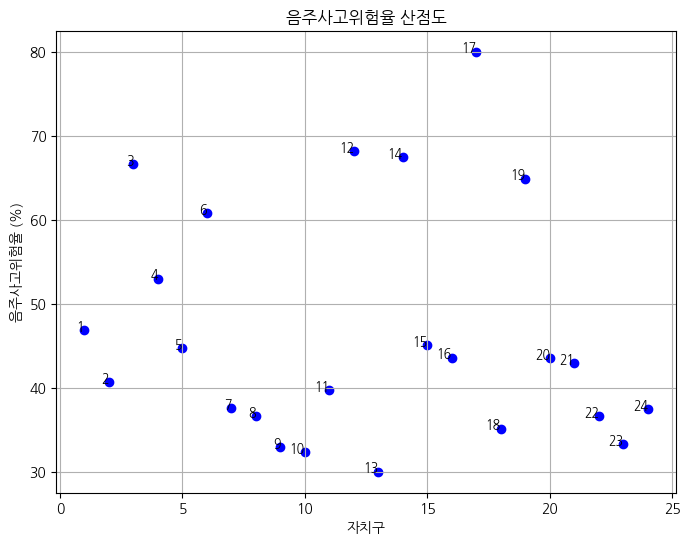

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 주성분을 퍼센테이지로 변환
min_max_scaler = MinMaxScaler(feature_range=(30, 80))
principal_df['음주사고위험율'] = min_max_scaler.fit_transform(principal_df)

# 음주사고위험율 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(principal_df.index, principal_df['음주사고위험율'], color='blue', marker='o')

# 그래프 제목과 축 레이블 설정
plt.title('음주사고위험율 산점도')
plt.xlabel('자치구')
plt.ylabel('음주사고위험율 (%)')

# 자치구 라벨 추가
for idx, row in principal_df.iterrows():
    plt.text(idx, row['음주사고위험율'], idx, fontsize=9, ha='right')

plt.grid(True)
plt.show()

In [ ]:
data.columns

Index(['Unnamed: 0', 'CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '주차장개수',
       '지하철역개수', '사고건수', '자동차소유대수', '22년 음주단속수', '버스_승객_수', '지하철_승객_수',
       '버스승객수_scaled', '지하철승객수_scaled', '총승객수', '소음', '종사자수', '폐기물량', '남자',
       '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월',
       '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대', '70대',
       '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수', '음주사고위험율'],
      dtype='object')

In [ ]:
#'버스승객수_scaled',    '지하철승객수_scaled',

xcol=['평균알콜농도', '지하철_승객_수','자동차소유대수','음식점개수', '주점개수', '종사자수']
# 버리는 독립변수: 'CCTV개수', '가로등개수', '버스정류소개수', '주차장개수', '지하철역개수', '버스_승객_수', , '총승객수', '소음', '폐기물량'
ycol=['음주사고위험율']
# 버릴 종속변수
# 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
#        '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상',
#       'Afternoon', 'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night',
#       '22년 음주단속수','사고건수']
#        '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월',

## 여기서부터 다시

3.데이터 전처리

In [ ]:
xcol = ['음식점개수', '주점개수', '지하철역개수', '자동차소유대수', '총승객수', '종사자수']
ycol = ['음주사고위험율']
# 독립 변수와 종속 변수 분리
X = df0[xcol]
y = df0[ycol]


In [ ]:
# 랜덤포레스트 모델 정의
model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# K-Fold 크로스 밸리데이션
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# 결과 출력
print(f'Mean Squared Error (5-Fold CV): {-np.mean(cv_scores):.4f}')
print(f'R-squared (5-Fold CV): {np.mean(cv_r2_scores):.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Mean Squared Error (5-Fold CV): 102.0377
R-squared (5-Fold CV): 0.2034


In [ ]:
model.fit(X, y)

<ipython-input-107-6d10fe8973eb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
# 실제 행정동별 데이터 예측
new_data = pd.DataFrame({
    '음식점개수': [3300, 2300, 4400],
    '주점개수': [650, 600, 930],
    '지하철역개수': [12, 10, 18],
    '자동차소유대수': [7500, 5900, 11000],
    '총승객수': [0.1, 0.24, 0.38],
    '종사자수':[0.12,0.01,0.3]
})

predicted_risk = model.predict(new_data)
new_data['예측_음주운전사고위험율'] = predicted_risk
print(new_data)

   음식점개수  주점개수  지하철역개수  자동차소유대수  총승객수  종사자수  예측_음주운전사고위험율
0   3300   650      12     7500  0.10  0.12        43.964
1   2300   600      10     5900  0.24  0.01        39.655
2   4400   930      18    11000  0.38  0.30        69.153


In [ ]:
('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/최종병합데이터_소현.csv')

In [ ]:
# 독립 변수와 종속 변수 분리
X = df0[xcol]
y = df0[ycol]

# 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

K-Fold 크로스 밸리데이션을 사용하여 모델을 학습

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [ ]:
# 랜덤포레스트 모델 정의(회귀모델)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# K-Fold 크로스 밸리데이션
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# 결과 출력
print(f'Mean Squared Error (5-Fold CV): {-np.mean(cv_scores):.4f}')
print(f'R-squared (5-Fold CV): {np.mean(cv_r2_scores):.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Mean Squared Error (5-Fold CV): 110.7920
R-squared (5-Fold CV): 0.1249


 Mean Squared Error (MSE)가 95.5314이고, R-squared (R²) 값이 0.0689로 나타났다면 모델의 성능이 다소 부족하다고 볼 수 있습니다. R² 값이 1에 가까울수록 모델의 설명력이 높고, 0에 가까울수록 모델이 데이터를 잘 설명하지 못한다는 의미이므로, 0.0689는 매우 낮은 설명력을 나타냅니다.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting 모델 정의
gbr = GradientBoostingRegressor(random_state=42)

# K-Fold 크로스 밸리데이션
cv_scores_gbr = cross_val_score(gbr, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores_gbr = cross_val_score(gbr, X, y, cv=kf, scoring='r2')

# 결과 출력
print(f'Mean Squared Error (Gradient Boosting, 5-Fold CV): {-np.mean(cv_scores_gbr):.4f}')
print(f'R-squared (Gradient Boosting, 5-Fold CV): {np.mean(cv_r2_scores_gbr):.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Mean Squared Error (Gradient Boosting, 5-Fold CV): 85.1742
R-squared (Gradient Boosting, 5-Fold CV): 0.3774


In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 랜덤 포레스트 모델 정의
rf = RandomForestRegressor(random_state=42)

# 그리드 서치
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# 최적의 모델로 예측 및 평가
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')
print(f'Mean Squared Error (Best Model, 5-Fold CV): {-np.mean(cv_scores):.4f}')
print(f'R-squared (Best Model, 5-Fold CV): {np.mean(cv_r2_scores):.4f}')


KeyboardInterrupt: 

4.모델 학습

In [ ]:
# 모델 훈련
model.fit(X, y)


RandomForestRegressor(random_state=42)

In [ ]:
# 데이터를 80% 훈련 세트와 20% 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 랜덤포레스트 모델 정의
model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 검증
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# 예측 결과 출력
print("실제값: ", y_test.values)
print("예측값: ", y_pred)

<ipython-input-113-eb7ef548ac21>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error: 607.1831
R-squared: -0.2526
실제값:  [[ 67.5]
 [100. ]
 [ 80. ]
 [ 60.8]
 [ 33.3]]
예측값:  [48.4535 63.3865 51.8985 40.3895 44.539 ]


5.평가

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Drunk Driving Accidents using Random Forest')
plt.legend()
plt.show()

In [ ]:
# 변수 중요도 평가
feature_importances = model.feature_importances_
feature_names = data.drop(columns=['사고 발생 여부']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

In [ ]:
# 중요 변수 시각화
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances in Random Forest Model')
plt.show()

6.예측

In [ ]:
# 특정 행정동, 시간대, 요일에 대한 사고 발생 위험 예측
new_data = pd.DataFrame({
    '행정동': ['A행정동'],
    '시간대': ['18-19시'],
    '요일': ['금요일'],
    '음식점 수': [120],
    '술집 수': [50],
    '주차장 수': [30],
    '가로등 개수': [200],
    'CCTV 수': [150],
    '교통량': [5000],
    '인구 수': [15000],
    '20대 인구': [2000],
    '30대 인구': [2500],
    '40대 인구': [3000],
    '유동 인구 수': [5000],
    '회사 건물 수': [50],
    '대중교통 수': [5]
})

new_data_scaled = scaler.transform(new_data.drop(columns=['행정동', '시간대', '요일']))
predicted_risk = model.predict_proba(new_data_scaled)[:, 1]
print(f'예측 사고 발생 위험: {predicted_risk[0]:.2f}')